In [1]:
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\Jurgen\Desktop\FYP\Shared\CSV Files\News_Twitter_Stock_Reddit_NaN_Final.csv")
df = df.drop(["Date", "Stockname", "Close_USD", "High_USD", "Low_USD"], axis=1)

df

,News_Senti,Volume,Open_USD,Adj_Close_USD,Twitter_Senti,Reddit_Comment,Reddit_SelfText
0,NaN,NaN,NaN,NaN,NaN,0.167460,0.352600
1,NaN,13112253.0,41.508241,39.984037,NaN,0.091721,-0.167850
2,-0.013258,10959655.0,41.112864,40.782627,NaN,0.195632,0.065820
3,NaN,8776763.0,41.783077,40.692290,NaN,0.089100,0.192950
4,NaN,7039773.0,41.233912,40.416246,NaN,0.107269,0.191075
...,...,...,...,...,...,...,...
483,NaN,NaN,NaN,NaN,0.6369,NaN,NaN
484,0.107508,6431522.0,43.335973,43.848824,0.6369,NaN,NaN
485,0.139891,7581629.0,44.008072,43.751215,0.6729,NaN,NaN
486,NaN,8959435.0,43.406557,43.149714,0.9357,NaN,NaN


# Non NaN Stock Data + Sentiments Filled With 0

In [3]:
df[["News_Senti","Twitter_Senti", "Reddit_Comment", "Reddit_SelfText"]] = df[["News_Senti","Twitter_Senti", "Reddit_Comment", "Reddit_SelfText"]].fillna(0)
df = df.dropna().reset_index(drop=True)
print(df)

x = df.loc[:, df.columns != 'Adj_Close_USD']
X = x.to_numpy()
y = df["Adj_Close_USD"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

print("Training Rows: ",X_train.shape[0])
print("Testing Rows: ",X_test.shape[0])

     News_Senti      Volume   Open_USD  Adj_Close_USD  Twitter_Senti  \
0      0.000000  13112253.0  41.508241      39.984037         0.0000   
1     -0.013258  10959655.0  41.112864      40.782627         0.0000   
2      0.000000   8776763.0  41.783077      40.692290         0.0000   
3      0.000000   7039773.0  41.233912      40.416246         0.0000   
4      0.000000  17843706.0  40.692186      39.487791         0.0000   
..          ...         ...        ...            ...            ...   
318    0.000000   7879897.0  43.240752      43.325872         0.3612   
319    0.107508   6431522.0  43.335973      43.848824         0.6369   
320    0.139891   7581629.0  44.008072      43.751215         0.6729   
321    0.000000   8959435.0  43.406557      43.149714         0.9357   
322    0.107235  10304777.0  43.661609      43.147943         0.0000   

     Reddit_Comment  Reddit_SelfText  
0          0.091721        -0.167850  
1          0.195632         0.065820  
2          0.08910

# Dropping All Rows With NaN

In [ ]:
# df_dropped = df.dropna().reset_index(drop=True)
# df_dropped.shape


# X = df_dropped.loc[:, df_dropped.columns != 'Adj_Close_USD'].to_numpy()
# y = df_dropped["Adj_Close_USD"].to_numpy()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# print("Training Rows: ",X_train.shape[0])
# print("Testing Rows: ",X_test.shape[0])


# Random Forest Regressor

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

#Choosing the number of estimators that fits the model the best 
r2_value = []
for i in range(100, 1100, 100):
    model = RandomForestRegressor(n_estimators=i, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_value.append((metrics.r2_score(y_test, y_pred),i))
    print("R^2: {:.8f} n_estimators = {}".format(metrics.r2_score(y_test, y_pred), i))

r2 = pd.DataFrame(r2_value, columns = ["R2", "n_estimators"]).set_index("n_estimators")
n_est = r2.R2[r2.R2 == r2.R2.max()].index[0]


model = RandomForestRegressor(n_estimators = n_est, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print()
print("N_Estimators: ", n_est)
print('Coefficients: \n', model.feature_importances_)
print("R^2: ", metrics.r2_score(y_test, y_pred))
print("Variance Score: ", metrics.explained_variance_score(y_test, y_pred))
print("Max Error: ", metrics.max_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


R^2: 0.91866806 n_estimators = 100
R^2: 0.91965466 n_estimators = 200
R^2: 0.92029008 n_estimators = 300
R^2: 0.92075707 n_estimators = 400
R^2: 0.92053187 n_estimators = 500
R^2: 0.92091781 n_estimators = 600
R^2: 0.92099405 n_estimators = 700
R^2: 0.92098181 n_estimators = 800
R^2: 0.92106718 n_estimators = 900
R^2: 0.92109504 n_estimators = 1000

N_Estimators:  1000
Coefficients: 
 [0.00478747 0.01187511 0.96564125 0.00559602 0.00683663 0.00526352]
R^2:  0.9210950380238891
Variance Score:  0.9216712138142277
Max Error:  1.2609221327405322
Mean Absolute Error: 0.4573957366903276
Mean Squared Error: 0.311874066982769
Root Mean Squared Error: 0.5584568622398413


In [ ]:
model = [0.00478747, 0.01187511, 0.96564125, 0.00559602, 0.00683663, 0.00526352]

(X_test[0] * model ).sum() 

In [9]:
fi = pd.DataFrame({'Feature': list(x.columns),
                   'Importance': model.feature_importances_}).\
                    sort_values('Importance', ascending = False)
fi

,Feature,Importance
2,Open_USD,0.965641
1,Volume,0.011875
4,Reddit_Comment,0.006837
3,Twitter_Senti,0.005596
5,Reddit_SelfText,0.005264
0,News_Senti,0.004787


# Linear Regression

In [5]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.8f'
      % r2_score(y_test, y_pred))
# The intercept
print("Intercept: ", regr.intercept_)

Coefficients: 
 [ 4.07250436e-01 -1.09236387e-08  9.35981373e-01  1.19096664e-01
 -1.08655001e+00 -5.75836140e-02]
Mean squared error: 0.27
Coefficient of determination: 0.93043532
Intercept:  2.4754100718997094


# Visualization

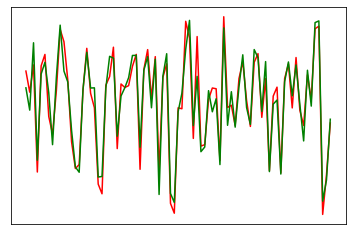

In [7]:
import matplotlib.pyplot as plt

# Plot outputs

plt.plot(y_test, color = "red")
plt.plot(y_pred, color = "green")


plt.xticks(())
plt.yticks(())

plt.show()

In [8]:
test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': (y_pred - y_test)})
test


,Actual,Predicted,Difference
0,40.056229,39.356954,-0.699275
1,39.177294,38.428678,-0.748616
2,40.312575,41.236436,0.923861
3,35.849020,36.341482,0.492462
4,40.273477,39.932183,-0.341293
...,...,...,...
76,41.821004,42.077256,0.256252
77,41.928229,42.148178,0.219949
78,34.081815,34.635833,0.554018
79,35.728689,35.513194,-0.215495


# NOT USED

In [ ]:
# import eli5
# from eli5.sklearn import PermutationImportance

# feature = df.loc[:,df.columns != 'Adj_Close_USD'].columns.values.tolist()

# feature_x = []
# for i in range(6):
#     feature_x.append("x" + str(i))
# feature_x

# weight_relation = pd.DataFrame({"Columns" : feature, 
#                                 "Feature" : feature_x}).set_index("Feature")
# print(weight_relation)


# perm = PermutationImportance(text_classifier).fit(X_test, y_test)
# eli5.show_weights(perm)



# K Nearest Neighbours

In [10]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test, pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    
rmse_val = pd.DataFrame(rmse_val)
print(rmse_val)
print(rmse)

           0
0   3.049429
1   2.532204
2   2.441639
3   2.334015
4   2.307908
5   2.248404
6   2.223232
7   2.117851
8   2.130005
9   2.137744
10  2.107699
11  2.120138
12  2.104619
13  2.114095
14  2.106457
15  2.086551
16  2.088655
17  2.075051
18  2.058484
19  2.081496


NameError: name 'rmse' is not defined

In [11]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import numpy as np

rmse_val = [] #to store rmse values for different k
for K in range(7):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test, pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    
rmse_val = pd.DataFrame(rmse_val)
# print(rmse_val)
print("K = ",rmse_val.idxmin()[0])

K =  6


In [12]:
from sklearn import metrics
from sklearn import neighbors
from math import sqrt




knn = neighbors.KNeighborsRegressor(n_neighbors = 6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


print("R^2: ", metrics.r2_score(y_test, y_pred))
print("Variance Score: ", metrics.explained_variance_score(y_test, y_pred))
print("Max Error: ", metrics.max_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


R^2:  -0.2790098713178073
Variance Score:  -0.2765168402124403
Max Error:  5.2520608666666675
Mean Absolute Error: 1.7940409752263369
Mean Squared Error: 5.055322254635389
Root Mean Squared Error: 2.2484043796958297


# CLASSIFIER

In [ ]:
#Classifier

# df1 = pd.read_csv(r"C:\Users\Jurgen\Desktop\FYP\News\SK-Learn\News_Stock_Data_30.csv")
# X = df1["News_Senti"].to_numpy().reshape(-1, 1)
# y = df1["Stock_Changes"].to_numpy()
# df1

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn import metrics

# clf = RandomForestClassifier(n_estimators=100)
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)
# # Model Accuracy, how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
# count = 0
# for i in range(len(y_test)):
#     if y_test[i] == y_pred[i]:
#         count += 1
# print(count, '/', len(y_test))
# print(y_test)
# print(y_pred)